In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

2022-11-20 02:31:19.813660: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
#!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

In [3]:
#!unzip dino-dragon.zip

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-20 02:31:22.171048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 02:31:22.178697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 02:31:22.179422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 02:31:22.180614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [6]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
             metrics=['acc'])

## <u>Question 1</u>

Since we have a binary classification problem, what is the best loss function for us?

- **binary crossentropy <----**
- focal loss
- mean squared error
- categorical crossentropy

## <u>Question 2</u>

What's the total number of parameters of the model? You can use the summary method for that.

- 9215873
- **11215873 <----**
- 14215873
- 19215873


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory('./dino-dragon/train',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [10]:
test_generator = test_datagen.flow_from_directory('./dino-dragon/test',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 394 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


2022-11-20 02:31:24.659478: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 02:31:25.295972: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 02:31:25.296918: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 02:31:25.296963: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 02:31:25.297829: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 02:31:25.297905: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 110ms/step - loss: 0.6634 - acc: 0.6023 - val_loss: 0.5566 - val_acc: 0.7995
Epoch 2/10
80/80 [==============================] - 9s 107ms/step - loss: 0.5016 - acc: 0.7905 - val_loss: 0.4427 - val_acc: 0.8147
Epoch 3/10
80/80 [==============================] - 8s 106ms/step - loss: 0.4093 - acc: 0.8287 - val_loss: 0.3803 - val_acc: 0.8426
Epoch 4/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3763 - acc: 0.8469 - val_loss: 0.3706 - val_acc: 0.8426
Epoch 5/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3421 - acc: 0.8632 - val_loss: 0.3849 - val_acc: 0.8249
Epoch 6/10
80/80 [==============================] - 9s 106ms/step - loss: 0.2928 - acc: 0.8764 - val_loss: 0.3231 - val_acc: 0.8680
Epoch 7/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2670 - acc: 0.8977 - val_loss: 0.3077 - val_acc: 0.8655
Epoch 8/10
80/80 [==============================] - 9s 106ms/step - loss: 0.2297 - acc

In [12]:
acc = history.history

In [13]:
acc = history.history['acc']

## <u>Question 3</u>

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- **0.90 <----**
- 0.20

In [14]:
acc_median = np.median(acc)
acc_median

0.8698243498802185

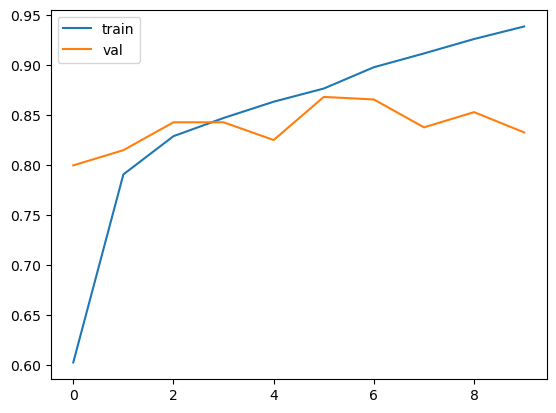

In [15]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')

plt.legend()
plt.show()

## <u>Question 4</u>

What is the standard deviation of training loss for all the epochs for this model?

- **0.11 <----**
- 0.66
- 0.99
- 0.33

In [16]:
loss_std = history.history['loss']

In [17]:
loss_std = np.std(loss_std)
loss_std

0.13909230568666076

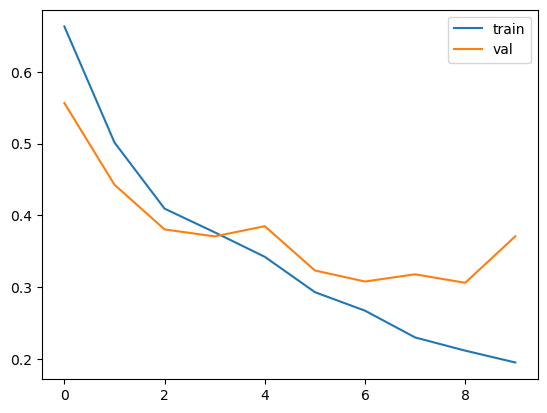

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend()
plt.show()

## <u>Question 5</u>

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- **0.37 <----**
- 0.97

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [20]:
train_generator = train_datagen.flow_from_directory('./dino-dragon/train',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_generator = test_datagen.flow_from_directory('./dino-dragon/test',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 394 images belonging to 2 classes.


In [23]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 15s 191ms/step - loss: 0.4321 - acc: 0.8055 - val_loss: 0.3400 - val_acc: 0.8503
Epoch 2/10
80/80 [==============================] - 15s 190ms/step - loss: 0.4200 - acc: 0.8187 - val_loss: 0.6137 - val_acc: 0.7183
Epoch 3/10
80/80 [==============================] - 15s 190ms/step - loss: 0.4067 - acc: 0.8218 - val_loss: 0.3646 - val_acc: 0.8299
Epoch 4/10
80/80 [==============================] - 15s 191ms/step - loss: 0.4053 - acc: 0.8068 - val_loss: 0.4926 - val_acc: 0.7868
Epoch 5/10
80/80 [==============================] - 15s 190ms/step - loss: 0.3859 - acc: 0.8294 - val_loss: 0.4966 - val_acc: 0.7893
Epoch 6/10
80/80 [==============================] - 15s 193ms/step - loss: 0.3600 - acc: 0.8419 - val_loss: 0.4698 - val_acc: 0.7944
Epoch 7/10
80/80 [==============================] - 15s 192ms/step - loss: 0.3646 - acc: 0.8388 - val_loss: 0.5012 - val_acc: 0.7919
Epoch 8/10
80/80 [==============================] - 15s 191ms/step - 

In [24]:
loss_std = history.history['loss']

In [25]:
loss_std = np.mean(loss_std)
loss_std

0.38470838963985443

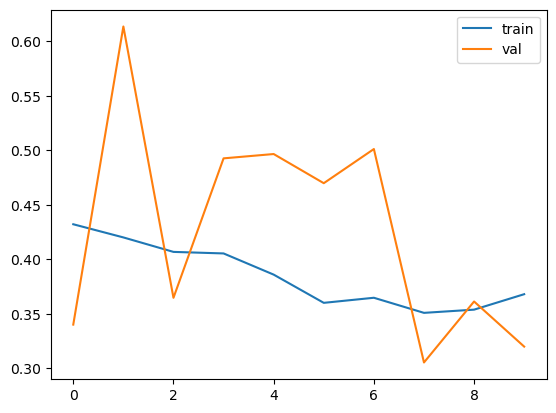

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend()
plt.show()

## <u>Question 6</u>

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- **0.84 <----**
- 0.54
- 0.44
- 0.24

In [27]:
acc = history.history['acc']

In [28]:
acc_five = acc[5:10]

In [29]:
mean_acc = np.mean(acc_five)
mean_acc

0.8404015183448792

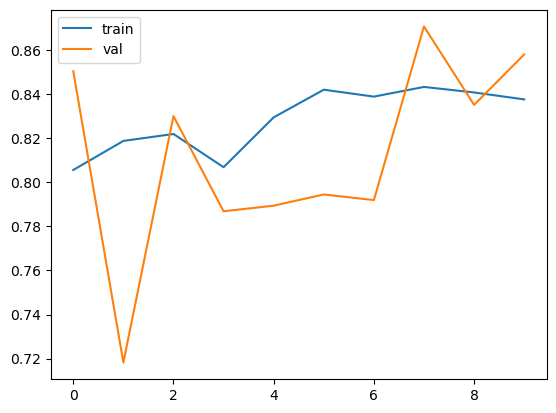

In [30]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')

plt.legend()
plt.show()

In [ ]:
!tar chvfz notebook.tar.gz *